In [1]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.dpi'] = 150

In [2]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_3/Half-Plate only'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [3]:
time = [] #array for all time data lists
V1 = [] #Same again for votlage readings


for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=3)
    time.append(np.linspace(0, 10, len(Data[:, 0][0::100])))
    V1.append(Data[:, 1][0::100]) 

Just to look at the data how they look if there is not made a fit

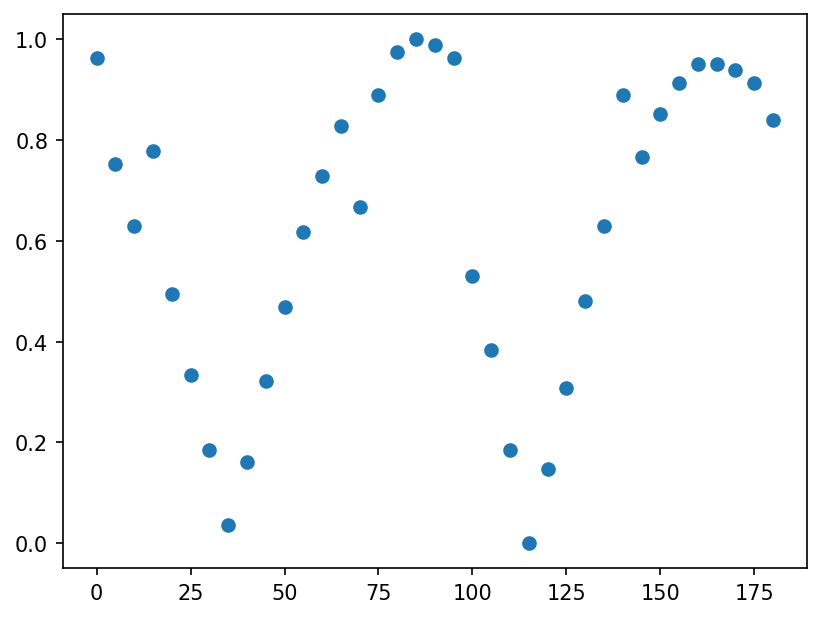

In [4]:
amplitudes = np.array([(max(v) - min(v)) for v in V1])
amplitudes = (amplitudes - amplitudes.min()) / (amplitudes.max() - amplitudes.min())
angles = np.linspace(0, 180, 37)
plt.plot(angles, (amplitudes - amplitudes.min()) / (amplitudes.max() - amplitudes.min()), 'o')

Text(0.5, 1.0, 'Amplitude of Laser at different Half-Plate angles')

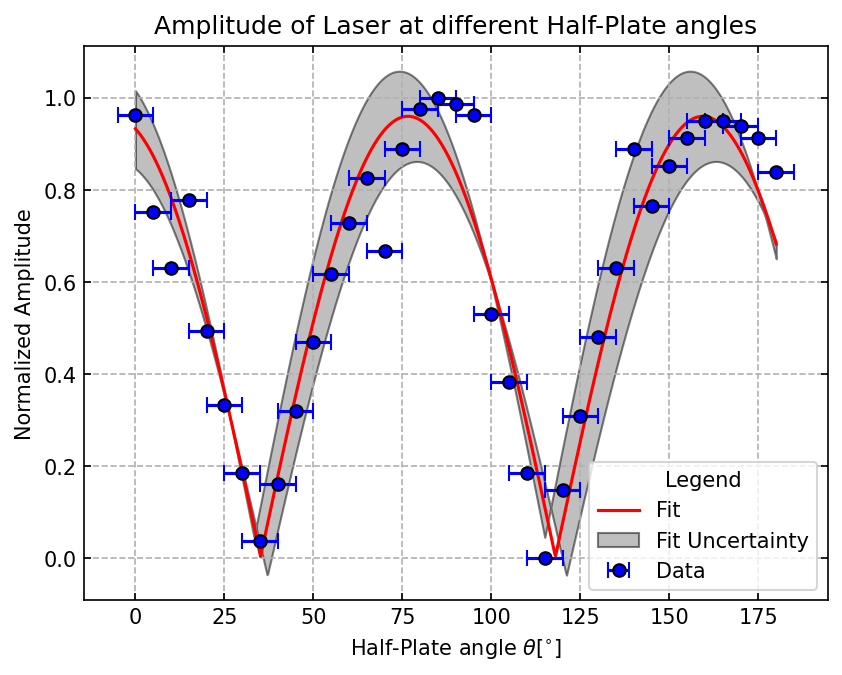

In [16]:
def amp_fit(theta, *p):
    c = p[0]
    a = p[1]
    b = p[2]
    d = p[3]
    return c * abs(np.cos(a * theta + b)) + d

p0 = [1, 0.03, 1.7, 0]
p_opt, p_cov = sc.curve_fit(amp_fit, angles, amplitudes, p0 = p0)

angles_help = np.linspace(0, 180, 1000)
paramter_err = np.sqrt(np.diag(p_cov))

plt.plot(angles_help, amp_fit(angles_help, *p_opt), color = 'red', label = 'Fit')
# plt.plot(angles_help, amp_fit(angles_help, *p0))
plt.errorbar(angles, amplitudes, xerr = 5, fmt = 'o', capsize = 4, color = 'blue', label = 'Data', markeredgecolor = 'k')
plt.fill_between(angles_help, amp_fit(angles_help, p_opt[0] + np.sqrt(p_cov[0][0]), p_opt[1] + np.sqrt(p_cov[1][1]), p_opt[2] + np.sqrt(p_cov[2][2]),
                                        p_opt[3] + np.sqrt(p_cov[3][3])), amp_fit(angles_help, p_opt[0] - np.sqrt(p_cov[0][0]), p_opt[1] - np.sqrt(p_cov[1][1]), 
                                        p_opt[2] - np.sqrt(p_cov[2][2]), p_opt[3] - np.sqrt(p_cov[3][3])), color = 'grey', edgecolor = 'k', alpha = 0.5,
                                        label = 'Fit Uncertainty')

plt.legend(title = 'Legend')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', right = True, top = True)
plt.xlabel(r'Half-Plate angle $\theta [^{\circ}]$')
plt.ylabel(r'Normalized Amplitude')
plt.title('Amplitude of Laser at different Half-Plate angles')